# **`Agent Memory`**

## MemorySaver in LangGraph
#### LangGraph uses Checkpointers for storing memory at each state

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama-3.3-70b-versatile")
# llm.invoke('what is LLM')
#### Model Depreciation Link ::: https://console.groq.com/docs/deprecations

In [51]:
def add(a , b):
    """
    Add two numbers a and b
    Args:
    a : first int
    b : Second int

    """
    return a + b
def multiplication(a , b):
    """
    multiply two numbers a and b
    Args:
    a : first int
    b : Second int

    """
    return a * b
tools = [add , multiplication]

In [52]:
llm_with_tool = llm.bind_tools(tools)

In [53]:
## Defining the state of Graph

from typing import Annotated , TypedDict
from langgraph.graph.message import add_messages # this is the reducer for appending messages in the list
from langchain_core.messages import AnyMessage , AIMessage , HumanMessage 
class State(TypedDict):
    messages : Annotated[list[AnyMessage] , add_messages]
    
def llm_tool(state : State):
    
    return {'messages' : [llm_with_tool.invoke(state['messages'])]}

In [54]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode , tools_condition
builder = StateGraph(State)
## Adding nodes in LLM 
builder.add_node('llm_tool' , llm_tool)
builder.add_node('tools' , ToolNode(tools))

## Defining the WorkFlow

builder.add_edge(START , 'llm_tool')
builder.add_conditional_edges('llm_tool' , tools_condition)
builder.add_edge('tools' , 'llm_tool')



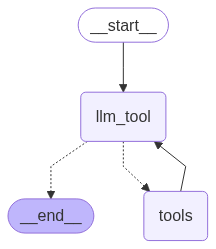

In [55]:
## Each and Every node when executed this particular checkpoints got updated

from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

graph_memory = builder.compile(checkpointer=memory)
display(Image(graph_memory.get_graph().draw_mermaid_png()))

In [56]:
## Specify the Thread 

config = {"configurable" : {"thread_id" : "1"}} ## each thread_id should be unique for user

In [57]:
messages = [HumanMessage(content="Add 12 and 13")]
from pprint import pprint
messages = graph_memory.invoke({"messages" : messages} , config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (dcstcwggm)
 Call ID: dcstcwggm
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The result of adding 12 and 13 is 25.


In [58]:
messages = [HumanMessage(content="multiply that number with 2")]
from pprint import pprint
messages = graph_memory.invoke({"messages" : messages} , config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (dcstcwggm)
 Call ID: dcstcwggm
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The result of adding 12 and 13 is 25.
================================ Human Message =================================

multiply that number with 2
================================== Ai Message ==================================
Tool Calls:
  multiplication (f04n84e5s)
 Call ID: f04n84e5s
  Args:
    a: 25
    b: 2
================================= Tool Message =================================
Name: multiplication

50
================================== Ai Message ==================================

The result of multiplying 25 by 2 is 50.
